In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [2]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3]:
X = mnist.data
y = mnist.target

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

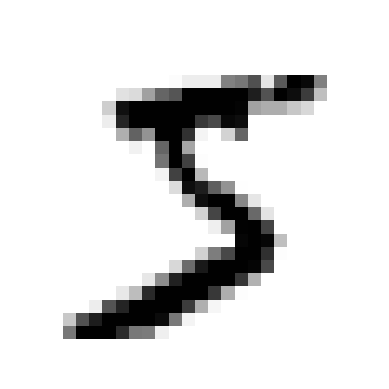

In [7]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [8]:
y[0]

'5'

# Create test set!

In [9]:
X_train = X[:60000]
X_test  = X[60000:]
y_train = y[:60000]
y_test  = y[60000:]

In [10]:
X_train.shape

(60000, 784)

In [11]:
y_train.shape

(60000,)

# Training a very simple binary classifier: is 5 or not? (hot dog or not hot dog)

In [12]:
y_train_5 = (y_train == "5")
y_test_5  = (y_test == "5")

In [13]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

## Stochastic Gradient Descent (SGD) classifier

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

# Performance measures

## Why cross validation is not ideal for classification

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
any(dummy_clf.predict(X_train))

False

In [18]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

90% accuracy for the dummy classifier. That's because 90% of images are not 5's, so using cross validation is not so useful for classification.

## Confusion matrices

In [19]:
from sklearn.model_selection import cross_val_predict

# Unlike cross_val_score which returns evaluation scores for each k-fold, 
# cross_val_predict returns the prediction directly made on each test fold.
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [20]:
y_train_pred.shape

(60000,)

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [22]:
# Top row: Actual negative values
# Bottom row: Actual positive values
# Left col: Predicted negative values
# Right col: Predicted positive values

In [23]:
# The perfect confusion matrix
y_train_perfect_predictions = y_train_5 # Pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and recall

In [24]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [25]:
(3530)/(3530+687)
# TP / (TP + FP)

0.8370879772350012

In [26]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [27]:
(3530)/(3530+1891)
# TP / (TP + FN)

0.6511713705958311

In [28]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

### Adjusting threshold based on the decision function

In [29]:
sgd_clf.predict([some_digit])

array([ True])

In [30]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [31]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [32]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

#### How to decide which threshold to use

In [33]:
# Use cross_val_predict to return the decision function instead of the predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [34]:
y_scores.shape

(60000,)

In [35]:
# Compute precision recall curve function which compute the precision and recall for all possible thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

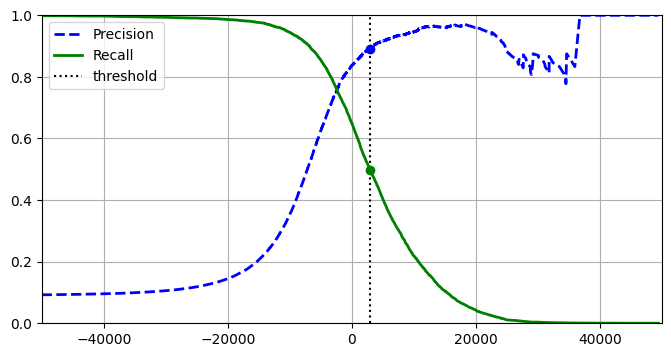

In [36]:
from matplotlib.patches import Circle

threshold = 3000

plt.figure(figsize=(8, 4))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# Beautify the figure
idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.legend()
plt.grid()
plt.axis([-50000, 50000, 0, 1.0])

plt.show()

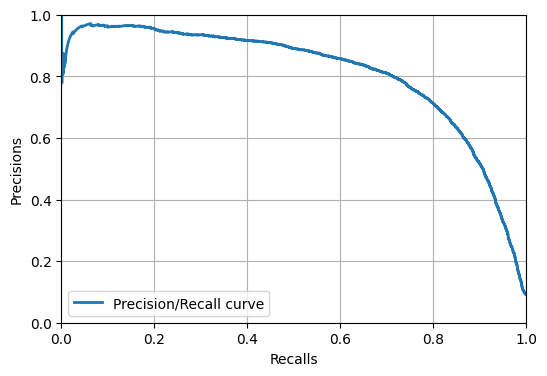

In [37]:
plt.figure(figsize=(6, 4))

plt.plot(recalls, precisions, label="Precision/Recall curve", linewidth=2)

plt.legend(loc="lower left")
plt.grid()
plt.axis([0, 1.0, 0, 1.0])
plt.xlabel("Recalls")
plt.ylabel("Precisions")

plt.show()

In [38]:
# argmax() returns the first index of the maximum value
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [39]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [40]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [41]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## The ROC Curve

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

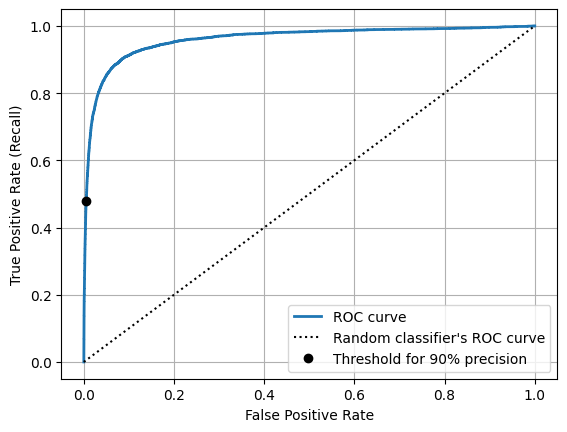

In [43]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90 = tpr[idx_for_threshold_at_90]
fpr_90 = fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], "k:", label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.legend(loc="lower right")
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")

plt.show()

In [44]:
# A good classifier would have an area under the curve (AUC) equal to 1; a purely random classifier will have one equal to 0.5

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## Try a RandomForestClassifier and compare the precision, recall and f1 scores

In [45]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [46]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [47]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [48]:
y_scores_forest = y_probas_forest[:, 1] # Only the positive probabilities
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

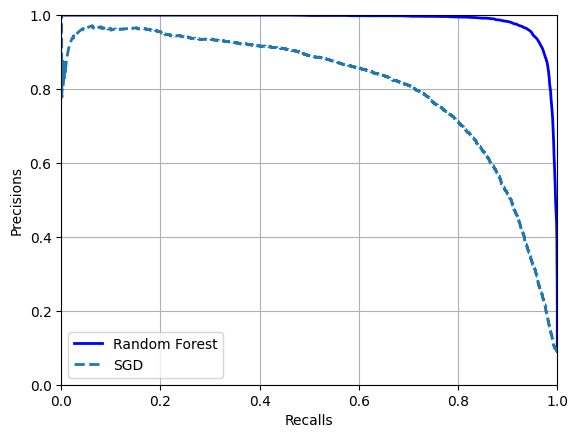

In [49]:
# Plot the original PR curve and the forest PR curve
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.legend(loc="lower left")
plt.grid()
plt.axis([0, 1.0, 0, 1.0])
plt.xlabel("Recalls")
plt.ylabel("Precisions")

plt.show()

In [50]:
# The forest PR curve is much more better than the SGD one.
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5 # Positive proba >= 50%
y_train_pred_forest

array([ True, False, False, ...,  True, False, False])

In [51]:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [52]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [53]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [54]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

# Multiclass classification (not just hot dog or not hot dog)

In [55]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000]) # y_train, not y_train_5

SVC(random_state=42)

In [56]:
svm_clf.predict([X[0]])

array(['5'], dtype=object)

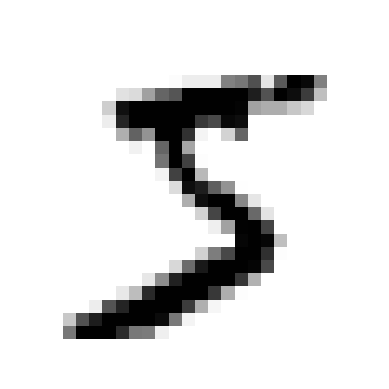

In [57]:
plot_digit(X[0])

In [58]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)
# Among the 10 scores per instance, the highest score is in the 5th position (9.3), so it's the most probable.

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [59]:
class_id = some_digit_scores.argmax()
class_id # This is just and index among the classes stored in classes_ attribute...

5

In [60]:
# ... so to look for the correct value...
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [61]:
# ... use the class_id as and index.
svm_clf.classes_[class_id]

'5'

## Using explicitly OvR classifier

In [62]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [63]:
svm_clf.predict([X[1]])

array(['0'], dtype=object)

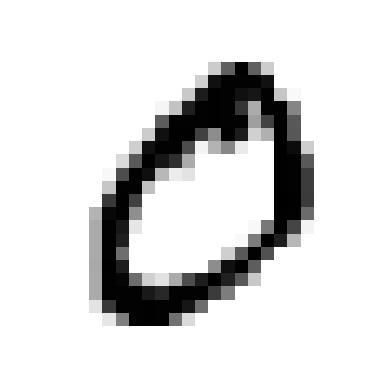

In [64]:
plot_digit(X[1])

In [65]:
len(ovr_clf.estimators_)

10

In [66]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [67]:
sgd_clf.predict([some_digit])
# Wrong prediction!

array(['3'], dtype='<U1')

In [68]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [69]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

KeyboardInterrupt: 

In [ ]:
X_train

In [ ]:
X_train_scaled

# Error analysis

## Display confusion matrices

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

KeyboardInterrupt: 

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [ ]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

In [ ]:
cl_a = "3"
cl_b = "5"
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] # Actual 3, predicted 3
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] # Actual 3, predicted 5
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] # Actual 5, predicted 3
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)] # Actual 5, predicted 5

In [ ]:
((y_train == cl_a) & (y_train_pred == cl_a))

In [ ]:
size = 10 # Images per block
plt.figure(figsize=(size, size))

for images, (row, col) in [(X_aa, (1, 0)), (X_ab, (1, 1)), # Coordinates start from bottom-left (not top-left like in monitors)
                      (X_ba, (0, 0)), (X_bb, (0, 1))]:
    for index, image in enumerate(images[:size*size]):
        x = (index % size) + (col * size)
        y = (index // size) + (row * size)
        plt.imshow(image.reshape(28, 28), cmap="binary", extent=(x, x + 1, y, y + 1))

#          X1    X2     Y1   Y2
plt.plot([size, size], [0, size * 2], "k:")
plt.plot([0, size * 2], [size, size], "k:")

plt.xticks(ticks=[size * 0.5, size * 1.5], labels=[cl_a, cl_b])
plt.yticks(ticks=[size * 0.5, size * 1.5], labels=[cl_b, cl_a])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

In [ ]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size)
        y = idx // size + label_row * (size)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Multilabel classification

In [77]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] # Concatenates along the second axis (append the data into another column).

knn_clf = KNeighborsClassifier() # Supports multilabel classification
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [78]:
knn_clf.predict([some_digit])
# some_digit = 5 -> False: not greater or equal than 7; True: It's odd

array([[False,  True]])

## Evaluate a multilabel classifier

In [79]:
# This computes the average f1 score across all labels:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [80]:
y_train_knn_pred

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [81]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [82]:
# Assign each label a weight equals to its support (i.e., the number of instandces with the target label) to compute the f1_score
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

## Multilabel classification for classifiers that doesn't support multilabel classification

In [83]:
# The ClassifierChain internally chain the prediction for the multiple labels.
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [84]:
chain_clf.predict([some_digit])
# some_digit = 5 -> False (0): not greater or equal than 7; True (1): It's odd

array([[0., 1.]])

# Multioutput classification

In [85]:
# Can have more than two possible values

np.random.seed(42)
noise = np.random.randint(0, 100, X_train.shape)
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, X_test.shape)
X_test_mod = X_test + noise

# Use the original values as the target. The goal is to predict the current values using the noisy ones (also useful to add more training data).
y_train_mod = X_train
y_test_mod = X_test

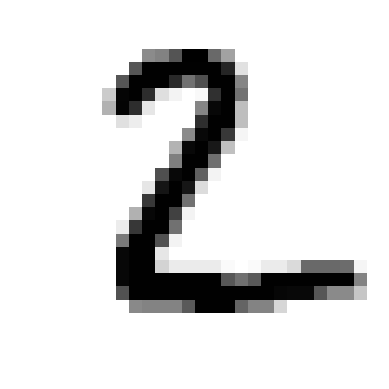

In [86]:
# Original image:
plot_digit(X_test[1])

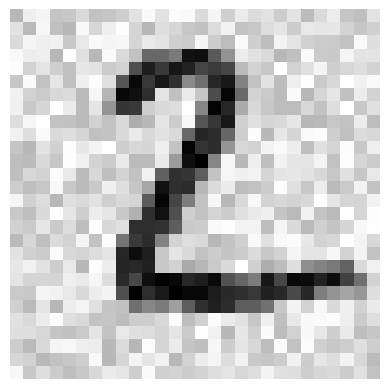

In [87]:
# Noisy image:
plot_digit(X_test_mod[1])

In [88]:
# Train the classifier to make it clean up the image:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

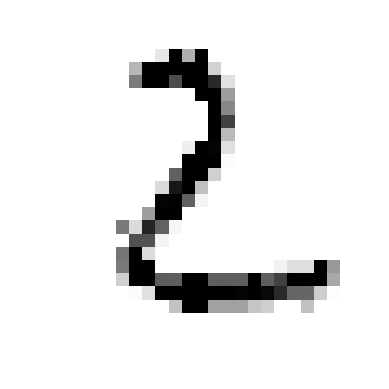

In [89]:
clean_digit_predicted = knn_clf.predict([X_test_mod[1]])
plot_digit(clean_digit_predicted)

plt.show()

# Exercises

## 1. Build a Classifier for the MNIST data that achieves over 97% accuracy on the test set

In [90]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
y_train_pred

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [92]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[5882,    4,    5,    0,    1,    5,   19,    1,    2,    4],
       [   2, 6705,   10,    2,    1,    1,    3,   11,    2,    5],
       [  51,   60, 5695,   15,   11,    4,    9,   87,   17,    9],
       [   8,   16,   39, 5903,    1,   63,    4,   40,   33,   24],
       [   3,   53,    1,    1, 5628,    0,   13,   11,    2,  130],
       [  14,   18,    4,   67,    6, 5211,   58,    7,   11,   25],
       [  24,   13,    1,    0,    5,   27, 5846,    0,    2,    0],
       [   4,   68,   14,    3,   20,    1,    0, 6083,    3,   69],
       [  25,   85,   15,   87,   35,  111,   26,   19, 5382,   66],
       [  19,   13,    5,   45,   46,   12,    5,   79,   15, 5710]])

In [93]:
precision_score(y_train, y_train_pred, average="weighted")

0.9676755320854337

In [94]:
knn_clf.score(X_test, y_test)
# 0.9688, not quite for the 97% required for the exercise

0.9688

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "weights": ["uniform", "distance"],
        "n_neighbors": [5, 6, 7, 8],
    }
]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [5, 6, 7, 8],
                          'weights': ['uniform', 'distance']}])

In [96]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [97]:
grid_search.best_score_

0.9694833333333334

In [98]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [99]:
best_knn_clf.score(X_test, y_test)

0.9709

In [100]:
grid_search.score(X_test, y_test) # The same as the previous line
# 0.9709 score!

0.9709

## 2. Data augmentation (or training set expansion)

In [101]:
from scipy.ndimage import shift

def shift_mnist(X, shift_value):
    image = shift(X.reshape(28, 28), shift_value)
    return image.reshape(-1)

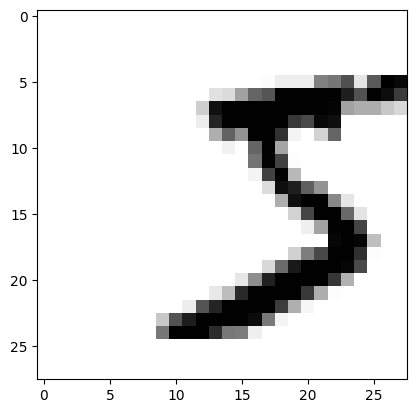

In [102]:
image = shift_mnist(X_train[0], [0, 5]).reshape(28, 28)
# plot_digit(image)
plt.imshow(image, cmap="binary")
plt.show()

In [135]:
import numpy as np

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# Make copies
for X, y in zip(X_train, y_train):
    for shift_value in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        image = shift_mnist(X, shift_value)
        X_train_augmented.append(image)
        y_train_augmented.append(y)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [131]:
X_train_augmented.shape[0] == X_train.shape[0]*5 and y_train_augmented.shape[0] == y_train.shape[0]*5

True

In [132]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [133]:
# Train classifier with the augmented train set
best_knn_clf = grid_search.best_estimator_
best_knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [134]:
best_knn_clf.score(X_test, y_test)
# With shift_value of 1 the score is 0.9772 -> Best than the previous exercise (0.9709)!
# With shift_value of 2 the score is 0.97
# With shift_value of 3 the score is 0.9681
# With shift_value of 4 the score is 0.9685
# With shift_value of 5 the score is 0.9699
# With shift_value of 6 the score is 0.9685

0.9685